**Data Description:**
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

**Domain:**

Object recognition

**Context:**

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**Attribute Information:**

● All the features are geometric features extracted from the silhouette.

● All are numeric in nature.

**Learning Outcomes:**

● Exploratory Data Analysis

● Reduce number dimensions in the dataset with minimal information loss

● Train a model using Principal Components

**Objective:**

Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Import and Read Data

In [2]:
df = pd.read_csv('vehicle.csv')

In [3]:
df.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.shape

(846, 19)

# 3. Data understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observations:**

Total 19 Attributes(18 independent and 1 target).

All independent attributes are Numeric type

Here we can see the dataset has null values as well because count of total null values is lesser than total row count in dataset.

In [6]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

**Observations:**

based on min, mean and max values, we could see lots of attributes has outliers.

e.g: max.length_aspect_ratio has mean of 8.567, minimum value is 2 but max value is 55.

In [7]:
sns.pairplot(df, hue='class', diag_kind='kde',height=7)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


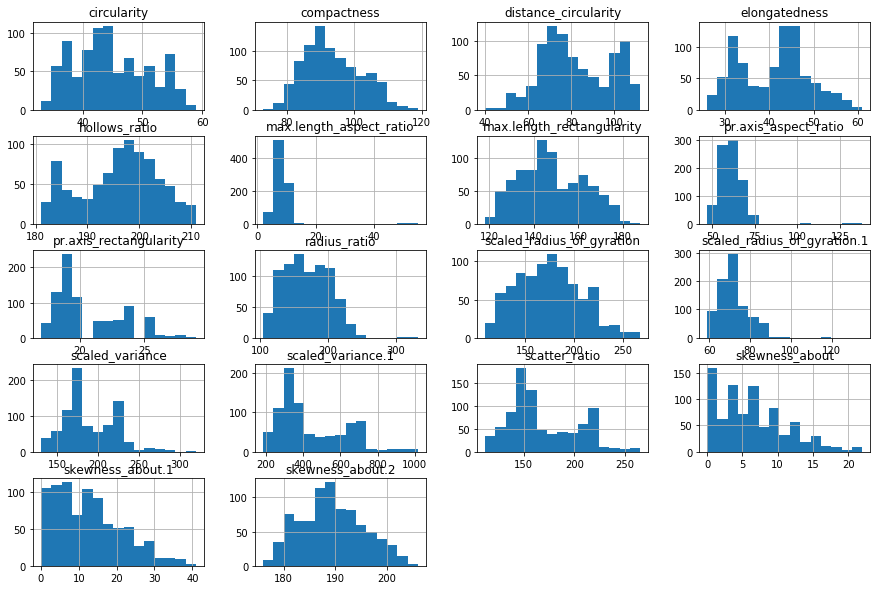

In [8]:
df.hist(bins=15, figsize=(15,10))
plt.show()

**Observations:**
 
Based on Pairplot and histogram plots, 
    We could see most of the vehicle classes are overlapping.
    We could also see most of the attributes are correlated to each other as well.
    we could also see distribution is somewhat normal for circularity, compactness(with outliers),max.length_rectangularity, scaled_radius_of_gyration, skeness_about.2
    most of other attributes are pretty much skewed.

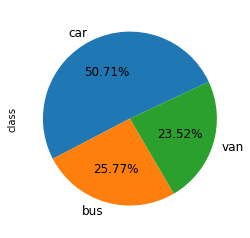

In [9]:
df["class"].value_counts().plot.pie(autopct='%1.2f%%',labels=['car','bus','van'], fontsize=12, startangle=25)

**Observations**

Car is distributed more in the dataset, but bus and van Classes are more or less evenly distributed.

## Correlation

As our target is of object type, to find the correlation of independent attributes to the target attribute cannot be measured.

So, 1st we will transform the target attribute to numeric and then check the correlation

In [10]:
df_copy = df.copy()

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
df_copy['class'] = LabelEncoder().fit_transform(df_copy['class'])

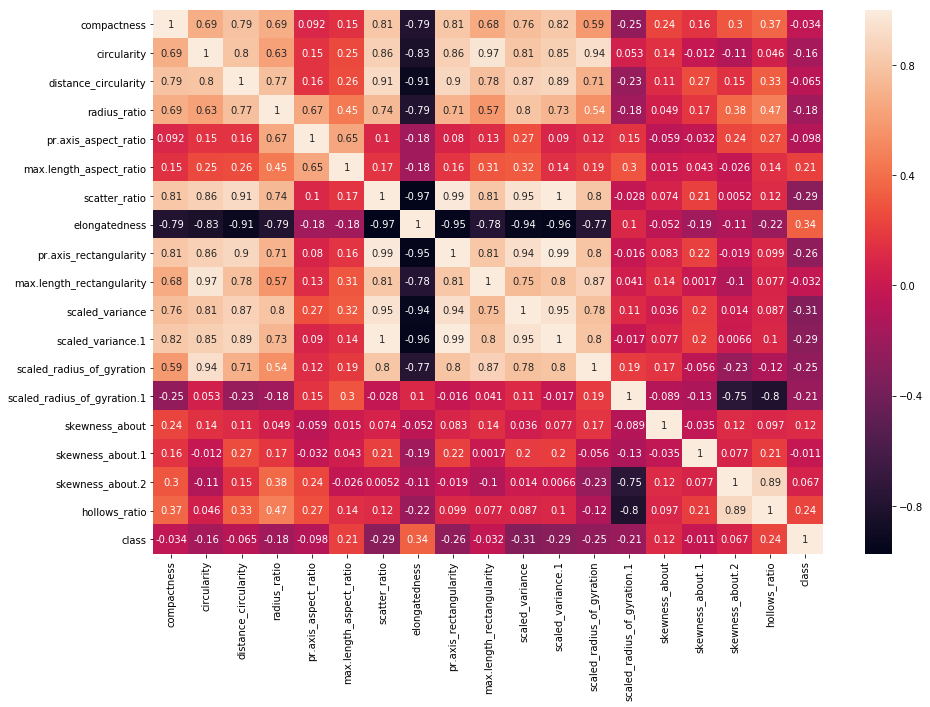

In [12]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(), cbar=True, annot=True)

**Observations:**
    
    We could see from the above correlation heatmap, there is no strong correlation between any of the attribute with the target attribute, which we also could infer from pairplot visualization.
    We could see very strong correlation between independent attributes.
    Strong negative correlation between 'elongatedness' and 'compactness' attribute (-0.79).

    Strong negative correlation between 'elongatedness' and 'circularity' attribute (-0.83)

    Strong negative correlation between 'elongatedness' and 'distance_circularity' attribute (-0.91)

    Strong negative correlation between 'elongatedness' and 'radius_ratio' attribute (-0.79)

    Strong negative correlation between 'elongatedness' and 'scatter_ratio' attribute (-0.97)

    Strong negative correlation between 'elongatedness' and 'pr.axis_rectangularity' attribute (-0.95)

    Strong negative correlation between 'elongatedness' and 'max.length_rectangularity' attribute (-0.78)

    Strong negative correlation between 'elongatedness' and 'scaled_variance' attribute (-0.94)

    Strong negative correlation between 'elongatedness' and 'scaled_variance.1' attribute (-0.96)

    Strong negative correlation between 'elongatedness' and 'scaled_radius_of_gyration' attribute (-0.77)

    Strong negative correlation between 'skewness_about.2' and 'scaled_radius_of_gyration.1' attribute (-0.75)

    Strong negative correlation between 'hollows_ratio' and 'scaled_radius_of_gyration.1' attribute (-0.8)
    
    As attribute 'elongatedness' is highly correalted with maximum of the attributes, we may keep only 'elongatedness' for our model building as information can be reduntant for the model and may impact the accuracy, but removing other attribues will lose vital information from the classification model. So we would use some method to transform the attribute values, so that it won't be correlated to other features and information of the attributes will also remain intact Such as PCA.

# 4. Data Preprocessing

## A. Handling Missing Values

In [13]:
df.apply(lambda x : sum(x.isna()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**Obsertvations**

As expected, we could see dataset has missing values.

As total observation count is less, we don't want to lose more data from our dataset. So, would be handling those missing values.

As we could see lots of outliers in the attributes, we will go ahead and impute median.


In [14]:
def impute_missing(data, impute_method):
    """
    This Method is to handle null values for numeric columns present in dataset
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    columns_numeric=data.select_dtypes(include=numerics).columns
    
    if data.apply(lambda x : sum(x.isna())).any(axis=0):
        for i in columns_numeric:
            if impute_method == 'mean':
                data[i] = data[i].fillna(int(data[i].mean()))
            if impute_method == 'median':
                data[i] = data[i].fillna(int(data[i].median()))
            if impute_method == 'mode':
                data[i] = data[i].fillna(int(data[i].mode()))
        print('Missing Value is handled successfully!!')
    else:
        print('No Missing Value found in dataset!!')

In [15]:
df_imputed = df.copy()
impute_missing(df_imputed,'median')

Missing Value is handled successfully!!


In [16]:
df.apply(lambda x : sum(x.isna()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [17]:
df_imputed.apply(lambda x : sum(x.isna()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## B. Handling Outliers

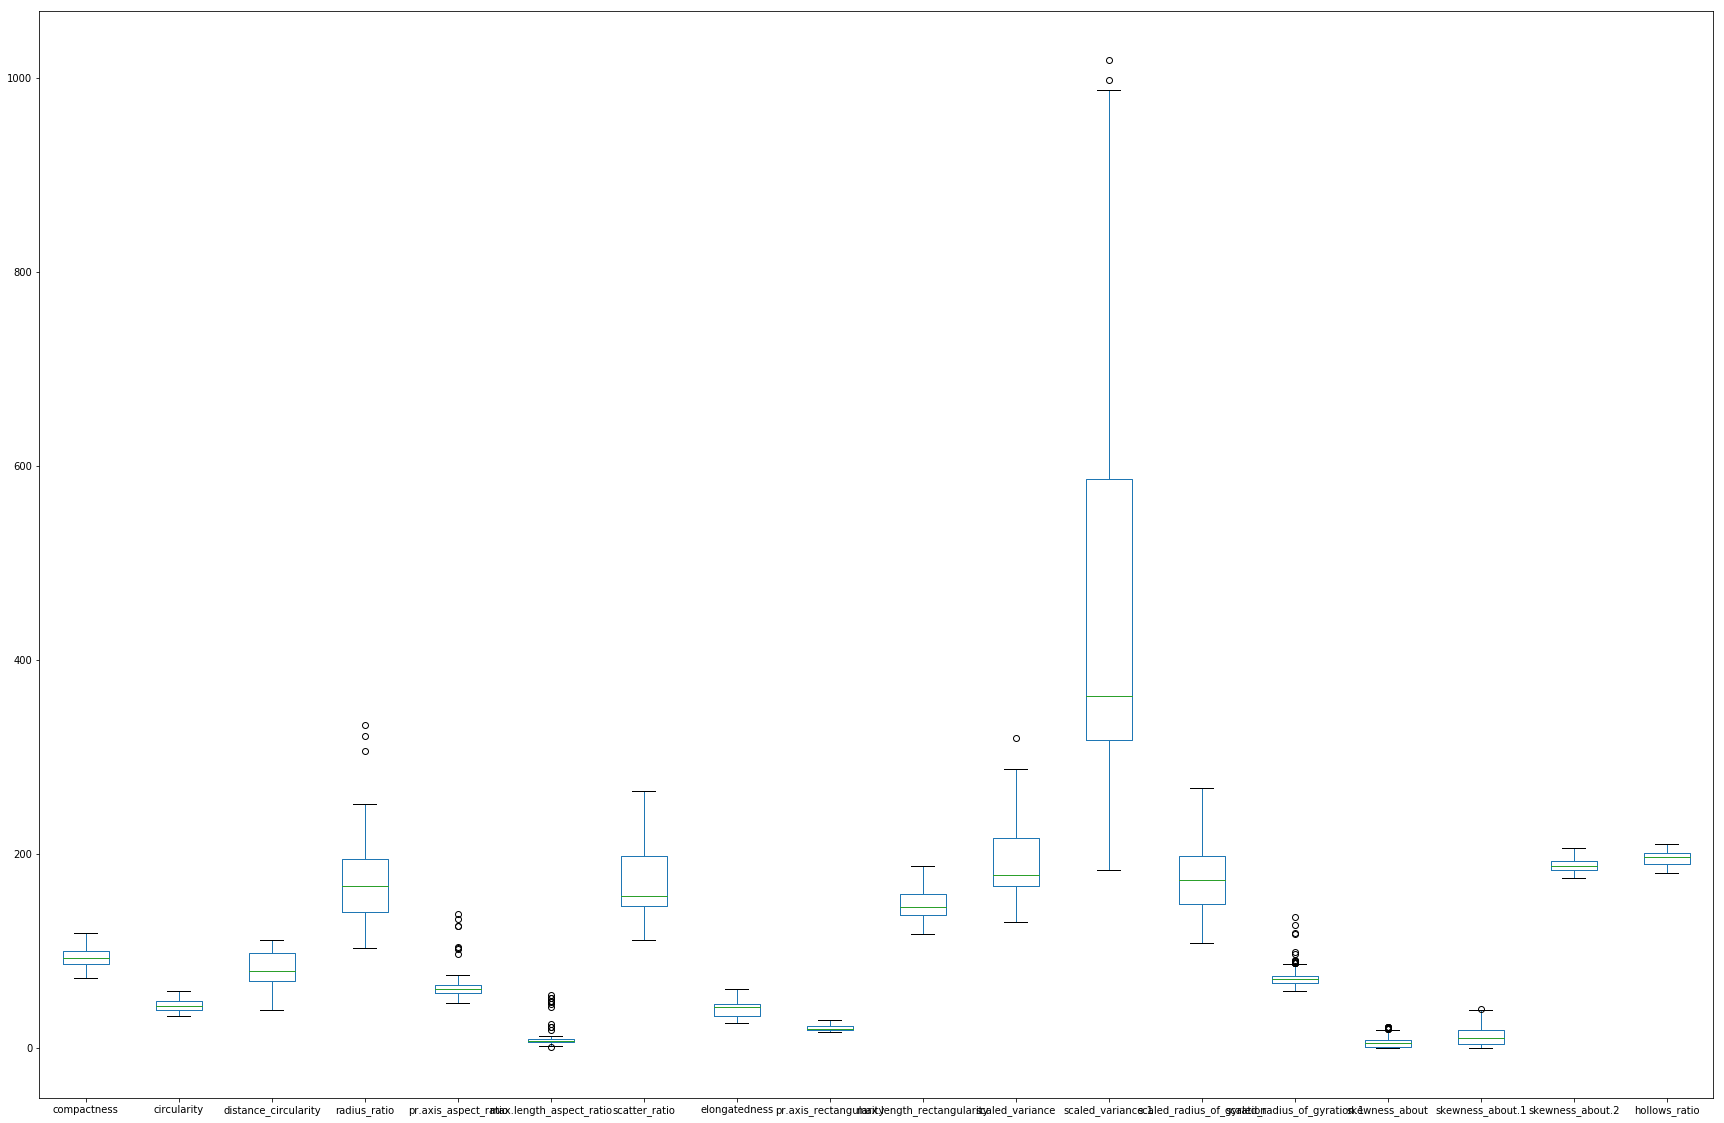

In [18]:
#fig = plt.figure(figsize=(25,15))
df.plot.box(figsize=(30,20))
plt.show()

**Observations:**

We could see outliers in 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1' attributes

## Visualize Boxplots on the attributes which has outliers only

In [19]:
def boxplots(data):
    car_radius_ratio = data[data['class']=='car']['radius_ratio']
    van_radius_ratio = data[data['class']=='van']['radius_ratio']
    bus_radius_ratio = data[data['class']=='bus']['radius_ratio']

    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(421)
    ax.boxplot([car_radius_ratio,van_radius_ratio,bus_radius_ratio], labels=['car', 'van','bus'])
    plt.title('radius_ratio vs class')

    car_pr_axis_aspect_ratio = data[data['class']=='car']['pr.axis_aspect_ratio']
    van_pr_axis_aspect_ratio = data[data['class']=='van']['pr.axis_aspect_ratio']
    bus_pr_axis_aspect_ratio = data[data['class']=='bus']['pr.axis_aspect_ratio']

    ax = fig.add_subplot(422)
    ax.boxplot([car_pr_axis_aspect_ratio,van_pr_axis_aspect_ratio,bus_pr_axis_aspect_ratio], labels=['car', 'van','bus'])
    plt.title('pr.axis_aspect_ratio vs class')

    car_max_length_aspect_ratio = data[data['class']=='car']['max.length_aspect_ratio']
    van_max_length_aspect_ratio = data[data['class']=='van']['max.length_aspect_ratio']
    bus_max_length_aspect_ratio = data[data['class']=='bus']['max.length_aspect_ratio']

    ax = fig.add_subplot(423)
    ax.boxplot([car_max_length_aspect_ratio,van_max_length_aspect_ratio,bus_max_length_aspect_ratio], labels=['car', 'van','bus'])
    plt.title('max.length_aspect_ratio vs class')

    car_scaled_variance = data[data['class']=='car']['scaled_variance']
    van_scaled_variance = data[data['class']=='van']['scaled_variance']
    bus_scaled_variance = data[data['class']=='bus']['scaled_variance']

    ax = fig.add_subplot(424)
    ax.boxplot([car_scaled_variance,van_scaled_variance,bus_scaled_variance], labels=['car', 'van','bus'])
    plt.title('scaled_variance vs class')

    car_scaled_variance_1 = data[data['class']=='car']['scaled_variance.1']
    van_scaled_variance_1 = data[data['class']=='van']['scaled_variance.1']
    bus_scaled_variance_1 = data[data['class']=='bus']['scaled_variance.1']

    ax = fig.add_subplot(425)
    ax.boxplot([car_scaled_variance_1,van_scaled_variance_1,bus_scaled_variance_1], labels=['car', 'van','bus'])
    plt.title('scaled_variance.1 vs class')

    car_scaled_radius_of_gyration_1 = data[data['class']=='car']['scaled_radius_of_gyration.1']
    van_scaled_radius_of_gyration_1 = data[data['class']=='van']['scaled_radius_of_gyration.1']
    bus_scaled_radius_of_gyration_1 = data[data['class']=='bus']['scaled_radius_of_gyration.1']

    ax = fig.add_subplot(426)
    ax.boxplot([car_scaled_radius_of_gyration_1,van_scaled_radius_of_gyration_1,bus_scaled_radius_of_gyration_1], labels=['car', 'van','bus'])
    plt.title('scaled_radius_of_gyration.1 vs class')

    car_skewness_about = data[data['class']=='car']['skewness_about']
    van_skewness_about = data[data['class']=='van']['skewness_about']
    bus_skewness_about = data[data['class']=='bus']['skewness_about']

    ax = fig.add_subplot(427)
    ax.boxplot([car_skewness_about,van_skewness_about,bus_skewness_about], labels=['car', 'van','bus'])
    plt.title('skewness_about vs class')

    car_skewness_about_1 = data[data['class']=='car']['skewness_about.1']
    van_skewness_about_1 = data[data['class']=='van']['skewness_about.1']
    bus_skewness_about_1 = data[data['class']=='bus']['skewness_about.1']

    ax = fig.add_subplot(428)
    ax.boxplot([car_skewness_about_1,van_skewness_about_1,bus_skewness_about_1], labels=['car', 'van','bus'])
    plt.title('skewness_about.1 vs class')

    plt.show()

### Visualize Boxplots on the original dataframe (df)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


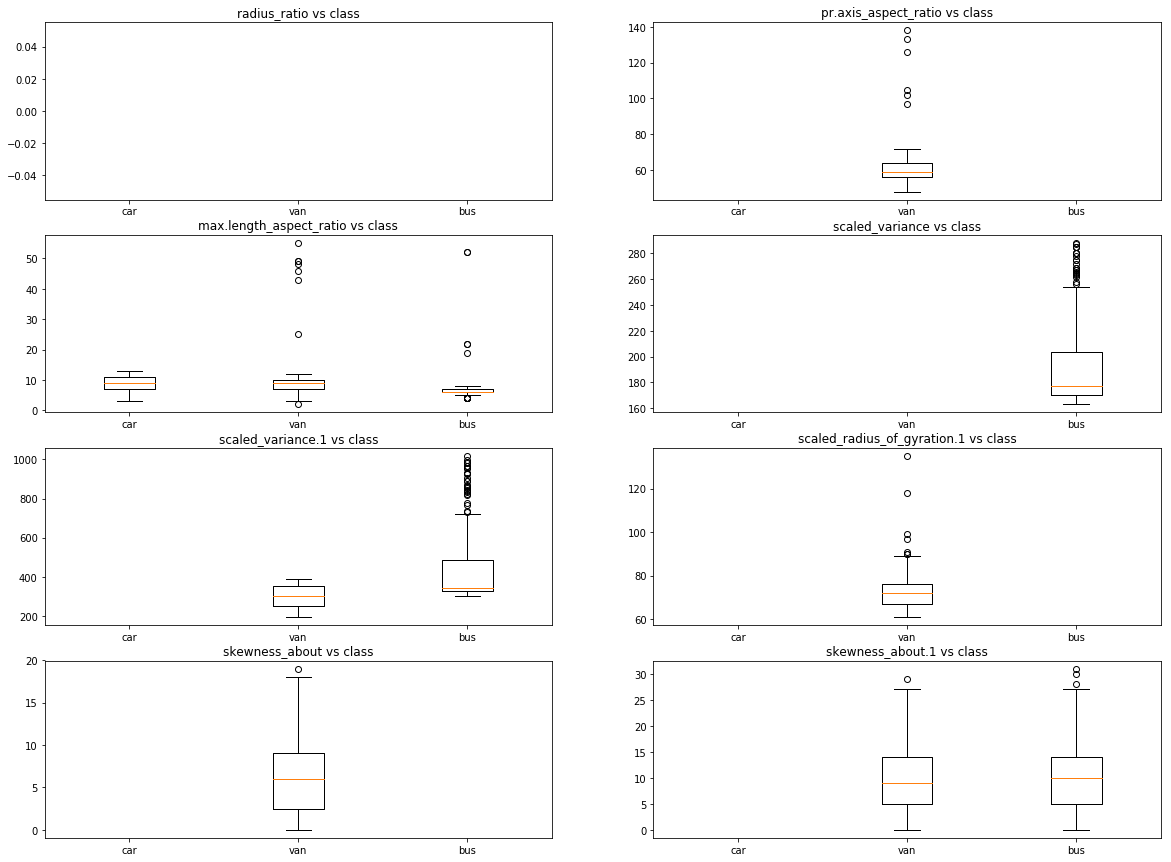

In [20]:
boxplots(df)

### Visualize Boxplots on the missing data imputed dataframe (df_imputed)

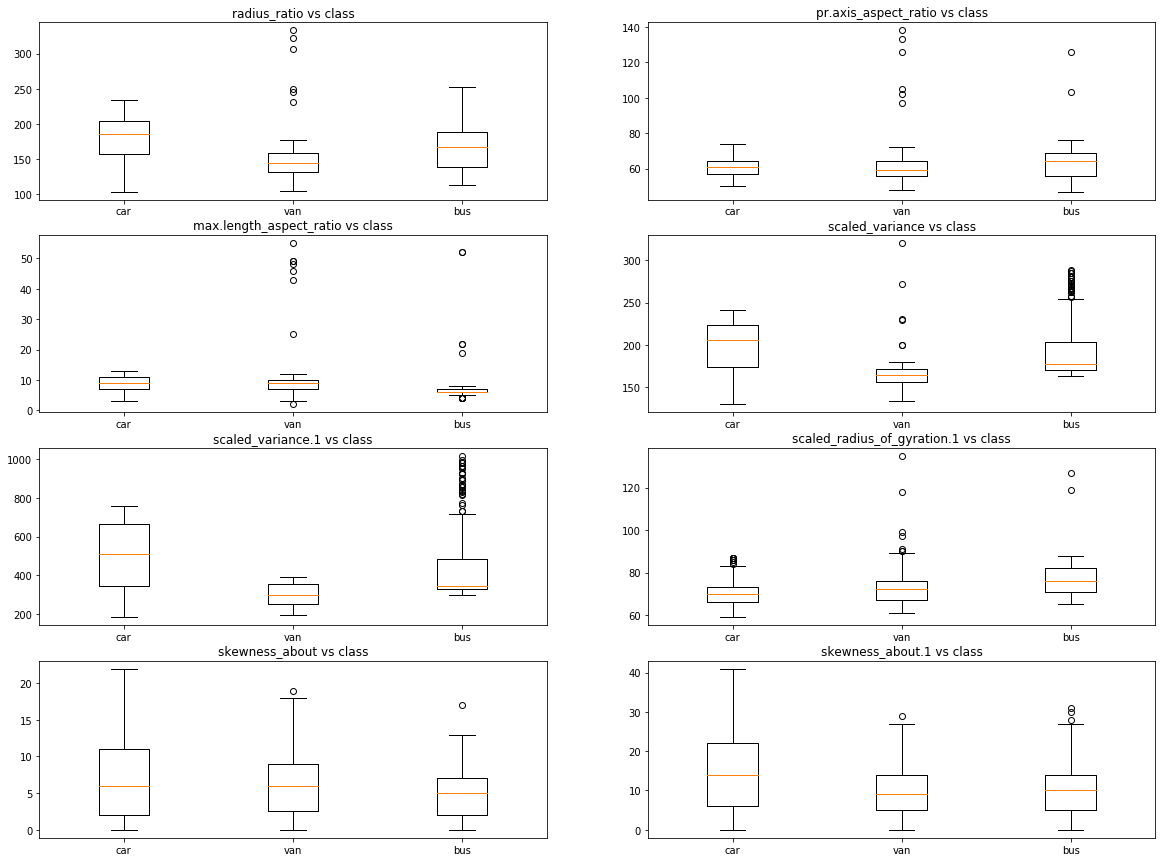

In [21]:
boxplots(df_imputed)

### Calculate IQR

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 

In [23]:
ub_lb_data = pd.DataFrame({'columns':upper_bound.index, 'upper_bound':upper_bound.values,'lower_bound':lower_bound.values,'IQR':IQR.values})

In [24]:
ub_lb_data

columns  upper_bound  lower_bound     IQR
0                   compactness      119.500       67.500   13.00
1                   circularity       62.500       26.500    9.00
2          distance_circularity      140.000       28.000   28.00
3                  radius_ratio      276.000       60.000   54.00
4          pr.axis_aspect_ratio       77.000       45.000    8.00
5       max.length_aspect_ratio       14.500        2.500    3.00
6                 scatter_ratio      274.500       70.500   51.00
7                 elongatedness       65.500       13.500   13.00
8        pr.axis_rectangularity       29.000       13.000    4.00
9     max.length_rectangularity      192.000      104.000   22.00
10              scaled_variance      292.000       92.000   50.00
11            scaled_variance.1      990.500      -85.500  269.00
12    scaled_radius_of_gyration      271.500       75.500   49.00
13  scaled_radius_of_gyration.1       87.000       55.000    8.00
14               skewness_about       19.500       -8.500    7.00
15             skewness_about.1       40.000      -16.000   14.00
16             skewness_about.2      206.500      170.500    9.00
17                hollows_ratio      217.125      174.125   10.75

In [25]:
df_outlier = df_imputed.copy()

In [26]:
median = (df_outlier.loc[df_outlier.radius_ratio < ub_lb_data[ub_lb_data['columns']=='radius_ratio']['upper_bound'].values[0], 'radius_ratio'].median() + df_outlier.loc[df_outlier.radius_ratio > ub_lb_data[ub_lb_data['columns']=='radius_ratio']['lower_bound'].values[0], 'radius_ratio'].median()) / 2
df_outlier.loc[df_outlier.radius_ratio > ub_lb_data[ub_lb_data['columns']=='radius_ratio']['upper_bound'].values[0], 'radius_ratio'] = np.nan
df_outlier.loc[df_outlier.radius_ratio < ub_lb_data[ub_lb_data['columns']=='radius_ratio']['lower_bound'].values[0], 'radius_ratio'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['pr.axis_aspect_ratio'] < ub_lb_data[ub_lb_data['columns']=='pr.axis_aspect_ratio']['upper_bound'].values[0], 'pr.axis_aspect_ratio'].median() + df_outlier.loc[df_outlier['pr.axis_aspect_ratio'] > ub_lb_data[ub_lb_data['columns']=='pr.axis_aspect_ratio']['lower_bound'].values[0], 'pr.axis_aspect_ratio'].median()) / 2
df_outlier.loc[df_outlier['pr.axis_aspect_ratio'] > ub_lb_data[ub_lb_data['columns']=='pr.axis_aspect_ratio']['upper_bound'].values[0], 'pr.axis_aspect_ratio'] = np.nan
df_outlier.loc[df_outlier['pr.axis_aspect_ratio'] < ub_lb_data[ub_lb_data['columns']=='pr.axis_aspect_ratio']['lower_bound'].values[0], 'pr.axis_aspect_ratio'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['max.length_aspect_ratio'] < ub_lb_data[ub_lb_data['columns']=='max.length_aspect_ratio']['upper_bound'].values[0], 'max.length_aspect_ratio'].median() + df_outlier.loc[df_outlier['max.length_aspect_ratio'] > ub_lb_data[ub_lb_data['columns']=='max.length_aspect_ratio']['lower_bound'].values[0], 'max.length_aspect_ratio'].median()) / 2
df_outlier.loc[df_outlier['max.length_aspect_ratio'] > ub_lb_data[ub_lb_data['columns']=='max.length_aspect_ratio']['upper_bound'].values[0], 'max.length_aspect_ratio'] = np.nan
df_outlier.loc[df_outlier['max.length_aspect_ratio'] < ub_lb_data[ub_lb_data['columns']=='max.length_aspect_ratio']['lower_bound'].values[0], 'max.length_aspect_ratio'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier.scaled_variance < ub_lb_data[ub_lb_data['columns']=='scaled_variance']['upper_bound'].values[0], 'scaled_variance'].median() + df_outlier.loc[df_outlier.scaled_variance > ub_lb_data[ub_lb_data['columns']=='scaled_variance']['lower_bound'].values[0], 'scaled_variance'].median()) / 2
df_outlier.loc[df_outlier.scaled_variance > ub_lb_data[ub_lb_data['columns']=='scaled_variance']['upper_bound'].values[0], 'scaled_variance'] = np.nan
df_outlier.loc[df_outlier.scaled_variance < ub_lb_data[ub_lb_data['columns']=='scaled_variance']['lower_bound'].values[0], 'scaled_variance'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['scaled_variance.1'] < ub_lb_data[ub_lb_data['columns']=='scaled_variance.1']['upper_bound'].values[0], 'scaled_variance.1'].median() + df_outlier.loc[df_outlier['scaled_variance.1'] > ub_lb_data[ub_lb_data['columns']=='scaled_variance.1']['lower_bound'].values[0], 'scaled_variance.1'].median()) / 2
df_outlier.loc[df_outlier['scaled_variance.1'] > ub_lb_data[ub_lb_data['columns']=='scaled_variance.1']['upper_bound'].values[0], 'scaled_variance.1'] = np.nan
df_outlier.loc[df_outlier['scaled_variance.1'] < ub_lb_data[ub_lb_data['columns']=='scaled_variance.1']['lower_bound'].values[0], 'scaled_variance.1'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['scaled_radius_of_gyration.1'] < ub_lb_data[ub_lb_data['columns']=='scaled_radius_of_gyration.1']['upper_bound'].values[0], 'scaled_radius_of_gyration.1'].median() + df_outlier.loc[df_outlier['scaled_radius_of_gyration.1'] > ub_lb_data[ub_lb_data['columns']=='scaled_radius_of_gyration.1']['lower_bound'].values[0], 'scaled_radius_of_gyration.1'].median()) / 2
df_outlier.loc[df_outlier['scaled_radius_of_gyration.1'] > ub_lb_data[ub_lb_data['columns']=='scaled_radius_of_gyration.1']['upper_bound'].values[0], 'scaled_radius_of_gyration.1'] = np.nan
df_outlier.loc[df_outlier['scaled_radius_of_gyration.1'] < ub_lb_data[ub_lb_data['columns']=='scaled_radius_of_gyration.1']['lower_bound'].values[0], 'scaled_radius_of_gyration.1'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier.skewness_about < ub_lb_data[ub_lb_data['columns']=='skewness_about']['upper_bound'].values[0], 'skewness_about'].median() + df_outlier.loc[df_outlier.skewness_about > ub_lb_data[ub_lb_data['columns']=='skewness_about']['lower_bound'].values[0], 'skewness_about'].median()) / 2
df_outlier.loc[df_outlier.skewness_about > ub_lb_data[ub_lb_data['columns']=='skewness_about']['upper_bound'].values[0], 'skewness_about'] = np.nan
df_outlier.loc[df_outlier.skewness_about < ub_lb_data[ub_lb_data['columns']=='skewness_about']['lower_bound'].values[0], 'skewness_about'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['skewness_about.1'] < ub_lb_data[ub_lb_data['columns']=='skewness_about.1']['upper_bound'].values[0], 'skewness_about.1'].median() + df_outlier.loc[df_outlier['skewness_about.1'] > ub_lb_data[ub_lb_data['columns']=='skewness_about.1']['lower_bound'].values[0], 'skewness_about.1'].median()) / 2
df_outlier.loc[df_outlier['skewness_about.1'] > ub_lb_data[ub_lb_data['columns']=='skewness_about.1']['upper_bound'].values[0], 'skewness_about.1'] = np.nan
df_outlier.loc[df_outlier['skewness_about.1'] < ub_lb_data[ub_lb_data['columns']=='skewness_about.1']['lower_bound'].values[0], 'skewness_about.1'] = np.nan
df_outlier.fillna(median,inplace=True)

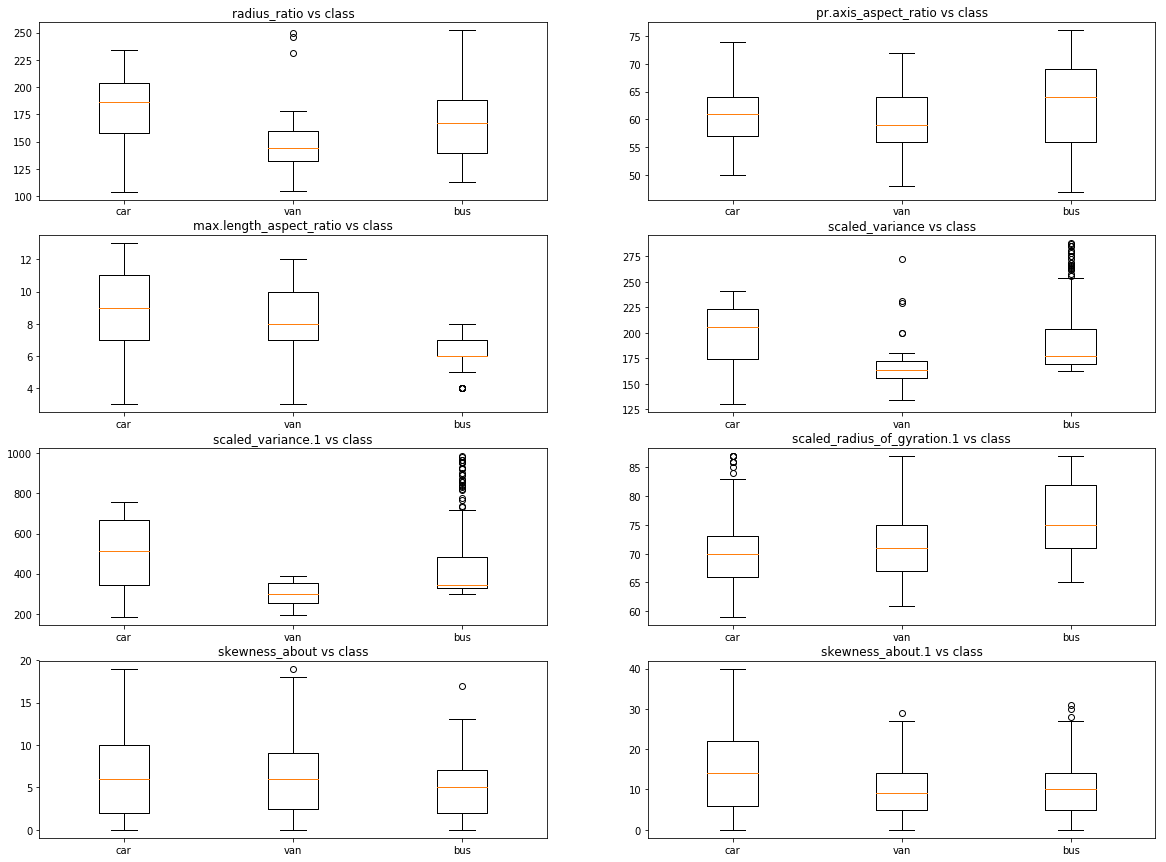

In [27]:
boxplots(df_outlier)

**We have taken care of quite a handful of outliers now**

# Elbow Plot and PCA

In [28]:
from sklearn.cluster import KMeans

In [29]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
df_outlier['class'] = LabelEncoder().fit_transform(df_outlier['class'])
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(df_outlier)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2    6.969484e+06
1             3    4.626229e+06
2             4    3.306480e+06
3             5    2.279414e+06

## Elbow Plot

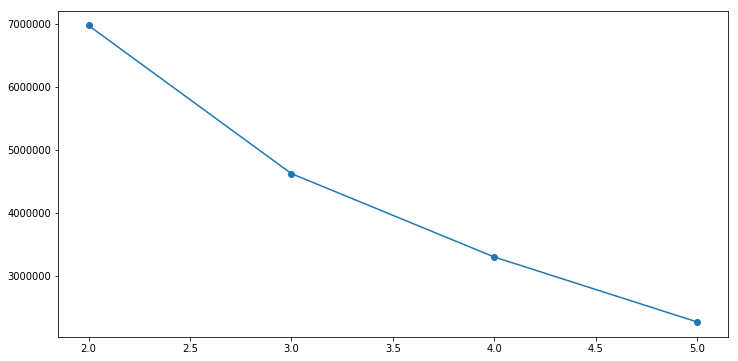

In [30]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters**

In [31]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

df_outlier_attr = df_outlier.drop('class',axis=1)
df_outlier_z = df_outlier_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 102)
cluster.fit(df_outlier_z)

prediction=cluster.predict(df_outlier_z)
df_outlier_z["group"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_outlier_z_copy = df_outlier_z.copy(deep = True)

In [32]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.17149041,  1.18355731,  1.22089952,  1.02462204,  0.21096745,
         0.71314877,  1.31214166, -1.22495493,  1.31301577,  1.11164124,
         1.23325028,  1.31352113,  1.09769962, -0.02364211,  0.14266768,
         0.27487951, -0.00528707,  0.17065978],
       [-0.24622237, -0.50978745, -0.28569798,  0.01017781,  0.3588627 ,
        -0.15144075, -0.44880848,  0.31186908, -0.47307439, -0.47245174,
        -0.37544481, -0.44967765, -0.53604886, -0.65007896, -0.05582205,
        -0.02937981,  0.73735921,  0.65415698],
       [-0.93762715, -0.56890296, -0.93500323, -1.14700395, -0.75332803,
        -0.5685339 , -0.79938795,  0.90154754, -0.7651785 , -0.54355377,
        -0.81855616, -0.79965239, -0.43595859,  0.96846687, -0.07673526,
        -0.26116503, -1.0630186 , -1.13683899]])

In [33]:
centroid_df = pd.DataFrame(centroids, columns = list(df_outlier_attr) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0     1.171490     1.183557              1.220900      1.024622   
1    -0.246222    -0.509787             -0.285698      0.010178   
2    -0.937627    -0.568903             -0.935003     -1.147004   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.210967                 0.713149       1.312142   
1              0.358863                -0.151441      -0.448808   
2             -0.753328                -0.568534      -0.799388   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -1.224955                1.313016                   1.111641   
1       0.311869               -0.473074                  -0.472452   
2       0.901548               -0.765178                  -0.543554   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.233250           1.313521                   1.097700   
1        -0.375445          -0.449678                  -0.536049   
2        -0.818556          -0.799652                  -0.435959   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.023642        0.142668          0.274880   
1                    -0.650079       -0.055822         -0.029380   
2                     0.968467       -0.076735         -0.261165   

   skewness_about.2  hollows_ratio  
0         -0.005287       0.170660  
1          0.737359       0.654157  
2         -1.063019      -1.136839

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209FCFBE6D8>,
      dtype=object)

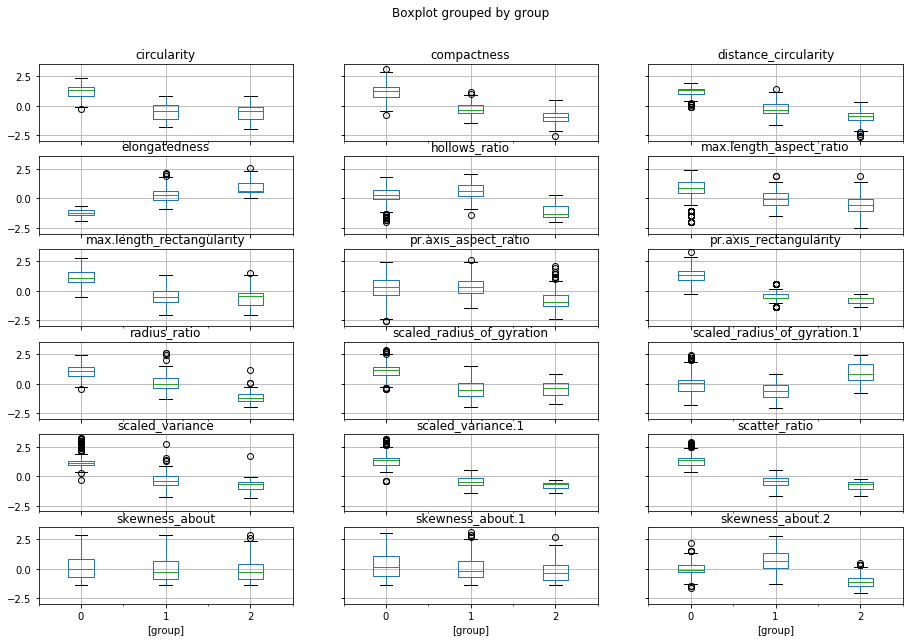

In [34]:
df_outlier_z.boxplot(by = 'group',  layout=(6,3), figsize=(15, 10))

In [35]:
data = df_outlier_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_outlier_z['group']))

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209FD3F7048>,
      dtype=object)

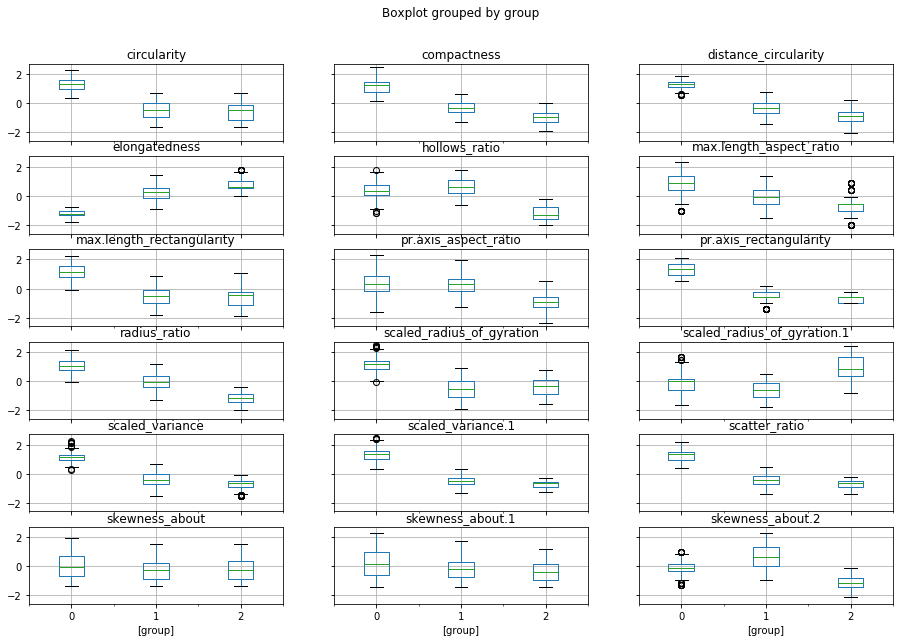

In [36]:
concat_data.boxplot(by = 'group', layout=(6,3), figsize=(15, 10))

In [37]:
cov_matrix = np.cov(df_outlier_z, rowvar=False)

np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort()
eig_pairs.reverse()    

eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [38]:
tot = sum(eigenvalues)

var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 4 entries as there are 4 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

cum_var_exp

array([0.54807506, 0.73030363, 0.79440428, 0.85527871, 0.90303061,
       0.93920115, 0.95630003, 0.96861017, 0.97584063, 0.98077052,
       0.98506325, 0.98890805, 0.9922391 , 0.99423541, 0.99588933,
       0.99747316, 0.99869221, 0.99972816, 1.        ])

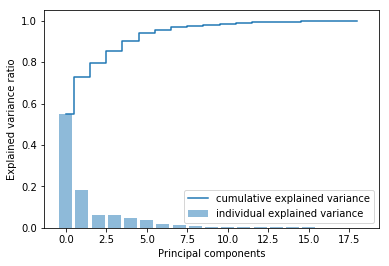

In [39]:
plt.bar(range(0, 19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

As data is having imbalanced classes (as shown below), classes is going to be highly influenced in the test and new data and will tend to overfit the model. 

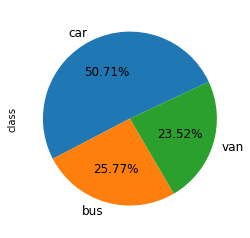


So, we will use **Stratified Sampling** method to overcome the imbalance issue

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_set, test_set in stratified.split(df_outlier, df_outlier["class"]):
    stratified_train = df_outlier.loc[train_set]
    stratified_test = df_outlier.loc[test_set]

In [41]:
X_train = stratified_train.drop('class', axis=1)
y_train = stratified_train['class']

X_test = stratified_test.drop('class', axis=1)
y_test = stratified_test['class']

In [42]:
y_train.value_counts()

1    300
0    153
2    139
Name: class, dtype: int64

In [43]:
y_test.value_counts()

1    129
0     65
2     60
Name: class, dtype: int64

In [44]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [45]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [46]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
pca.n_components_

7

**Observations:**
    
    from above we found how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 7 principal components.

## Classification Model:

Let's Apply SVM Classifier on dataset with or without PCA components

**train test set with PCA**

In [48]:
train_set_pca = pca.transform(train_img)
test_set_pca = pca.transform(test_img)

**train set without PCA is as below:**

    train_img, test_img
    
**train set with PCA is as below:**

    train_set_pca, test_set_pca

### SVM Without PCA

In [54]:
from sklearn.metrics import confusion_matrix

In [49]:
from sklearn import svm
clf = svm.SVC()  
clf.fit(train_img , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = clf.predict(test_img)

In [52]:
clf.score(train_img,y_train)

0.9763513513513513

In [51]:
clf.score(test_img,y_test)

0.9566929133858267

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 62,   2,   1],
       [  3, 125,   1],
       [  1,   3,  56]], dtype=int64)

### SVM With PCA

In [57]:
clf_pca = svm.SVC()  
clf_pca.fit(train_set_pca , y_train)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred_pca = clf_pca.predict(test_set_pca)

In [59]:
clf_pca.score(train_set_pca,y_train)

0.9510135135135135

In [60]:
clf_pca.score(test_set_pca,y_test)

0.9330708661417323

In [61]:
confusion_matrix(y_test,y_pred_pca)

array([[ 62,   2,   1],
       [  3, 121,   5],
       [  0,   6,  54]], dtype=int64)

**Observations:**
    from above we could see SVM classifier model without PCA components worked better than with PCA components.

### GridSearch

In [74]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [63]:
param_grid =  {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05, 0.5, 1]}

In [64]:
grid_clf = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, n_jobs=-1, cv='warn')

grid_clf.fit(train_img, y_train) 

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
print('Best score: ', grid_clf.best_score_)
print('Best C: ',grid_clf.best_estimator_.C) 
print('Best Kernel: ',grid_clf.best_estimator_.kernel)

Best score:  0.9375
Best C:  1
Best Kernel:  rbf


In [69]:
pd.DataFrame(grid_clf.cv_results_).loc[:, ['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\

mean_test_score  rank_test_score                           params
7         0.937500                1        {'C': 1, 'kernel': 'rbf'}
5         0.934122                2      {'C': 0.5, 'kernel': 'rbf'}
6         0.930743                3     {'C': 1, 'kernel': 'linear'}
4         0.929054                4   {'C': 0.5, 'kernel': 'linear'}
2         0.902027                5  {'C': 0.05, 'kernel': 'linear'}
0         0.863176                6  {'C': 0.01, 'kernel': 'linear'}
3         0.586149                7     {'C': 0.05, 'kernel': 'rbf'}
1         0.506757                8     {'C': 0.01, 'kernel': 'rbf'}

In [67]:
grid_clf_pca = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, n_jobs=-1, cv='warn')

grid_clf_pca.fit(train_set_pca, y_train)

print('Best score: ', grid_clf_pca.best_score_)
print('Best C: ',grid_clf_pca.best_estimator_.C) 
print('Best Kernel: ',grid_clf_pca.best_estimator_.kernel)

Best score:  0.9070945945945946
Best C:  1
Best Kernel:  rbf


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
pd.DataFrame(grid_clf_pca.cv_results_).loc[:, ['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\punit\Anaconda3\

mean_test_score  rank_test_score                           params
7         0.907095                1        {'C': 1, 'kernel': 'rbf'}
5         0.898649                2      {'C': 0.5, 'kernel': 'rbf'}
4         0.856419                3   {'C': 0.5, 'kernel': 'linear'}
6         0.854730                4     {'C': 1, 'kernel': 'linear'}
2         0.847973                5  {'C': 0.05, 'kernel': 'linear'}
0         0.836149                6  {'C': 0.01, 'kernel': 'linear'}
3         0.569257                7     {'C': 0.05, 'kernel': 'rbf'}
1         0.506757                8     {'C': 0.01, 'kernel': 'rbf'}

In [75]:
clf_cv = svm.SVC(C=1.0,kernel='rbf')
scores = cross_val_score(clf_cv, train_img, y_train, cv=5)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packa

In [76]:
scores

array([0.93277311, 0.94957983, 0.94117647, 0.96610169, 0.94871795])

In [77]:
clf_cv = svm.SVC(C=1.0,kernel='rbf')
scores_pca = cross_val_score(clf_cv, train_set_pca, y_train, cv=5)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packa

In [78]:
scores_pca

array([0.90756303, 0.91596639, 0.93277311, 0.92372881, 0.92307692])

**Conclusion**

from the above, we received 0.96610169 of cross validation score on fitting SVM classifier with C value of 1 and rbf kernel on scaled trained set which is higher than training same classifier on data with PCA components.